In [1]:
import numpy as np
import matplotlib.pyplot as plt
import custom_linalg as linalg
import regression as reg
np.random.seed(10000)

In [2]:
# data generation
F = lambda x: 10*(x**3)*np.exp(-2*x)
X = 0.8*np.random.rand(100)
X = np.sort(X)
noise = 0.05*np.random.randn(len(X))
Y = np.array([F(i) for i in X]) + noise
Yerr = 0.15*np.random.rand(100) 

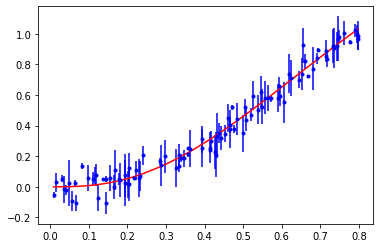

In [3]:
plt.errorbar(X,Y,Yerr,fmt=".b")
plt.plot(X,[F(i) for i in X],'r')

In [4]:
basis_f = {
    0: lambda x: 1,
    1: lambda x: np.log(x),
    2: lambda x: x
}

In [5]:
idx = np.where(Y>0)
A = np.zeros(len(basis_f.keys()))
x = X[idx]
y = np.log(Y[idx])
yerr = Yerr[idx]/Y[idx]

In [6]:
N = len(x)
f,b,cov = reg.get_best_fit_func(x,y,yerr,basis_f)
db = np.diag(cov)

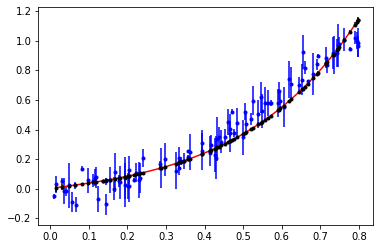

In [7]:
#f_fit = lambda x: b[0] + b[1]*np.log(x) + b[2]*x
y_fit = np.array([f(i) for i in x])
y_fit = np.exp(y_fit)
y_fit_err = reg.get_y_fit_err(x,f,cov, basis_f)
y_fit_err = np.exp(y_fit)*y_fit_err
plt.errorbar(X,Y,Yerr,fmt=".b")
plt.errorbar(x,y_fit,y_fit_err,fmt=".k")
plt.plot(x,y_fit,'r')

In [8]:
rchi2, p = reg.get_rchi2(f,x,y,yerr,len(basis_f.keys()))

In [13]:
b

array([[-1.73932709],
       [ 0.77231727],
       [ 2.5626505 ]])

In [17]:
A = np.exp(b[0]),b[1],b[2]

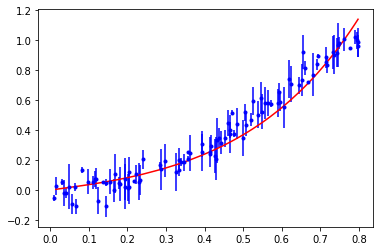

In [18]:
f_fit = lambda x: A[0]*(x**A[1])*np.exp(A[2]*x)
plt.errorbar(X,Y,Yerr,fmt=".b")
#plt.errorbar(x,y_fit,y_fit_err,fmt=".k")
plt.plot(x,[f_fit(i) for i in x],'r')